In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

#### Question 1,2,3,4

In [2]:
filename = "DBLPOnlyCitationOct19.txt"

In [3]:
datas = tuple(open(filename, 'r',  encoding="utf8"))

In [4]:
len(datas)

12775615

In [5]:
line = ""
save = []
sg = False


for s in tqdm(datas):
    s = s.replace("\n", "")
    if "#*" in s:
        if sg:
            save.append(
                {"id" : id_title,"title":title, "author": author, "venu" : venu, 
                 "year": year, "reference": publi, "nbAuthor" : len(author.split(',')),
                 "type": tpe}
            )
        else:
            sg = True
        publi = 0
        title = s[2:]
        id_title = ""
        author = ""
        year=""
        venu=""
        tpe = "Other"
        
    if "#index" in s:
        id_title = s[6:]
    if "#@" in s :
        author = s[2:]
    if "#t" in s:
        year = s[2:]
    if "#c" in s:
        venu = s[2:]
        if "STOC" in s:
            tpe = "STOC"
        if "SIGIR" in s :
            tpe = "SIGIR"
    if "#%" in s:
        publi += 1

100%|██████████| 12775615/12775615 [00:17<00:00, 731075.92it/s]


In [6]:
dt = pd.DataFrame(save)

In [65]:
# dt.to_csv("datas.csv", sep=',')

Get only STOC and SIGIR

In [8]:
siam_aai = dt[dt["type"]!="Other"]

In [9]:
siam_aai.head()

,author,id,nbAuthor,reference,title,type,venu,year
594377,"Krisztian Balog,Leif Azzopardi,Maarten de Rijke",594377,3,11,Formal models for expert finding in enterprise...,SIGIR,SIGIR,2006
594378,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",594378,3,2,Latent Semantic Indexing is an Optimal Special...,SIGIR,SIGIR,1992
594379,Rie Kubota Ando,594379,1,11,Latent semantic-space: iterative scaling impro...,SIGIR,SIGIR,2000
594380,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",594380,3,6,Automatic Combination of Multiple Ranked Retri...,SIGIR,SIGIR,1994
594381,"Christine Barthes,Pierre Glize",594381,2,4,Planning in an Expert System for Automated Inf...,SIGIR,SIGIR,1988


Remove article without author

In [58]:
len(siam_aai)

5828

In [10]:
siam_aai_clean = siam_aai[siam_aai['author'].notnull()]

In [12]:
len(siam_aai_clean)

5828

In [60]:
siam_aai_clean.to_csv("stoc_sigir.csv", index=False)

In [132]:
siam_aai[siam_aai["title"] == "A Language Modeling Approach to Information Retrieval."]

,Unnamed: 0,author,id,nbAuthor,reference,title,type,venu,year
595551,595551,"Jay M. Ponte,W. Bruce Croft",595551,2,6,A Language Modeling Approach to Information Re...,SIGIR,SIGIR,1998


### Question 5 - matrix document terme titre articles

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# On enleve les stop words 
count_vect = CountVectorizer(input="content", stop_words="english")

In [31]:
siam_aai = pd.read_csv("stoc_sigir.csv")

In [32]:
text = list(siam_aai["title"])

In [33]:
count_vect.fit(text)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
X = count_vect.transform(text)

In [35]:
voc = [ key for key,value in count_vect.vocabulary_.items()]

In [36]:
doc_terme = pd.DataFrame(X.todense(), columns = voc)

In [37]:
# add column id
doc_terme.insert(0, 'id', list(siam_aai["id"]))

In [38]:
doc_terme.head()

,id,aided,homomorphism,similarity,squared,dynamic,reedback,prefix,asian,preface,...,hyperterms,hnc,bch,coupling,ranks,blogs,factors,persistent,validation,bcs
0,594377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,594378,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,594379,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,594380,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,594381,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
doc_terme.to_csv("doc_terme_title.csv", index=False, encoding = 'utf-8')

#### Question 6

Creer le dataframe authors

In [13]:
siam_aai = pd.read_csv("stoc_sigir.csv")

In [14]:
all_author = []

In [15]:
author = [str(x).split(',') for x in list(siam_aai["author"])]
# set puis list => retire les doublons et renvoie une list
list_author = list(set([item for sublist in author for item in sublist]))

In [16]:
authors = [ {"id":index, "author":value} for index, value in enumerate(list_author) ]

In [17]:
a_df = pd.DataFrame(authors)
a_df.to_csv("authors.csv", sep=',')

In [18]:
a_df = pd.read_csv("authors.csv")

In [21]:
a_df.head()

,author,id
0,Sung-Soon Choi,0
1,Spyros C. Kontogiannis,1
2,Hitoshi Suzuki,2
3,Ting Liu,3
4,Srikanta J. Bedathur,4


Creer le dataframe qui relie authors - articles (comme un join sql)

In [45]:
list_publi_authors={x[1]["id"]: str(x[1]["author"]).split(",") for x in siam_aai.iterrows()}

In [46]:
l = [ (v, x[0]) for x in list_publi_authors.items() for v in x[1] ]

In [47]:
dt_auth_id = pd.DataFrame(l, columns=["author", "id_publication"])

In [22]:
# on join sur la colonne author afin d'avoir la liste de tout les authors par publication
dt_author_publication = pd.merge(dt_auth_id, a_df, on='author')

In [23]:
dt_author_publication = dt_author_publication.rename(index=str, columns={"id": "id_author"})

In [24]:
dt_author_publication.to_csv("author_publication", index=False)

In [25]:
dt_author_publication.head()

,author,id_publication,id_author
0,Krisztian Balog,594377,476
1,Krisztian Balog,596103,476
2,Krisztian Balog,596206,476
3,Krisztian Balog,596213,476
4,Krisztian Balog,596218,476


In [112]:
dt_author_publication = pd.read_csv("author_publication")

#### Question 7

Creation de la matrix document_terme sur les citations

In [59]:
siam_aai = pd.read_csv("stoc_sigir.csv")

In [60]:
from tqdm import tqdm_notebook

In [62]:
term = []
doc = []
ok = False
for s in tqdm_notebook(datas):
    if "#index" in s :
        ref = int(s[6:].replace("\n", ""))
    if "STOC" in s or "SIGIR" in s :
        ok=True
    if "#%" in s:
        citation = s[2:].replace("\n", "")
        if ok :
            term.append( citation )
            doc.append( ref )
            ok=False

In [67]:
count_vect = CountVectorizer()

In [68]:
count_vect.fit(term)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [69]:
X = count_vect.transform(term)

In [70]:
X.todense().sum() == len(term)

True

In [71]:
article_doc_term = pd.DataFrame(X.todense(), columns=count_vect.vocabulary_)

In [72]:
article_doc_term.insert(0, 'id_publication', doc)

In [74]:
# article_doc_term[article_doc_term["1519574"] > 0]

### document termes

In [137]:
tm = {}
ct = {}
ok=False
for s in tqdm(datas):
    s = s.strip().replace("\n", "")
    if s != "":
        if "#*" in s :
            ok=False
        if "#cSTOC" in s or "#cSIGIR" in s :
            ok=True
        if ok: 
            if "#index" in s :
                ref = int(s[6:].replace("\n", ""))
                continue

            if "#%" in s:
                citation = s[2:].replace("\n", "")
                
                if str(ref) in tm.keys():
                    tm[str(ref)].append(str(citation))
                else:
                    tm[str(ref)] = [str(citation)]

100%|██████████| 12775614/12775614 [00:14<00:00, 905425.14it/s] 


## Qlick Sense 

In [10]:
datas = pd.read_csv("stoc_sigir.csv")

#### Autheur plus productif

In [26]:
auth = pd.read_csv("author_publication")

In [34]:
prod = auth[['author', 'id_publication']].groupby("author").agg(['count'])

In [37]:
prod.to_csv("auteurs_plus_productif.csv", index=True)

#### Article les plus populaires

In [18]:
articles = pd.read_csv("articles.csv")
articles.head()

,Iden,Title,Authers,Year,Venue,Id,ListCitation,Abstract,NbrAuther,NbrCitation
0,1,Formal models for expert finding in enterprise...,"Krisztian Balog,Leif Azzopardi,Maarten de Rijke",2006,SIGIR,594377,"595386 , 362694 , 772628 , 595551 , 26506 , 5...",Searching an organization's document reposito...,3,11
1,2,Latent Semantic Indexing is an Optimal Special...,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",1992,SIGIR,594378,"771904 , 2025",Latent Semantic Indexing (LSI) is a technique...,3,2
2,3,Latent semantic-space: iterative scaling impro...,Rie Kubota Ando,2000,SIGIR,594379,"937405 , 594378 , 243650 , 594808 , 594831 , ...",We present a novel algorithm that creates doc...,1,11
3,4,Automatic Combination of Multiple Ranked Retri...,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",1994,SIGIR,594380,"1120095 , 772280 , 595299 , 936910 , 1120350 ...",NaN,3,6
4,5,Planning in an Expert System for Automated Inf...,"Christine Barthes,Pierre Glize",1988,SIGIR,594381,"595655 , 594818 , 594757 , 3446",Searching online databases requires an inform...,2,4


In [19]:
t = pd.DataFrame()

In [20]:
t["title"] = articles["Title"]
t["citations"] = articles["NbrCitation"]

In [32]:
p = t.sort_values(by=['citations'], ascending=False)

In [37]:
p[0:25].to_csv("best_articles.csv", index=False)

In [133]:
art = pd.read_csv("articles_best.csv")

In [141]:
art_b = [str(x).split(",") for x in list(art["ListCitation"])]

In [143]:
flat_id = [ y.strip() for x in art_b for y in x]

In [152]:
from collections import Counter
w = sorted([(v, k) for k, v in Counter(flat_id).items()], reverse=True)

In [177]:
# articles les plus cités
w[0:15]

[(1796, 'nan'),
 (161, '2025'),
 (100, '759'),
 (98, '595551'),
 (77, '936632'),
 (71, '610911'),
 (70, '621767'),
 (69, '85'),
 (66, '1059354'),
 (65, '596024'),
 (62, '793547'),
 (62, '595266'),
 (55, '595200'),
 (53, '164'),
 (51, '950870')]

In [180]:
art[art["Id"].isin([595551, 936632, 610911, 621767, 1059354, 596024, 793547,595200]) ]

,Iden,Title,Authers,Year,Venue,Id,ListCitation,Abstract,NbrAuther,NbrCitation
812,813,"Document Language Models, Query Models, and Ri...","John D. Lafferty,ChengXiang Zhai",2001,SIGIR,595200,"594518 , 790393 , 937019 , 610911 , 949996 , ...",We present a framework for information retrie...,2,9
1161,1162,A Language Modeling Approach to Information Re...,"Jay M. Ponte,W. Bruce Croft",1998,SIGIR,595551,"595181 , 936229 , 595621 , 184796 , 935823 , ...",NaN,2,6
1627,1628,A Study of Smoothing Methods for Language Mode...,"ChengXiang Zhai,John D. Lafferty",2001,SIGIR,596024,"595759 , 594518 , 790393 , 936632 , 595386 , ...",Language modeling approaches to information r...,2,9
2752,2753,The Complexity of Theorem-Proving Procedures,Stephen A. Cook,1971,STOC,621767,"950008 , 950117 , 949989",It is shown that any recognition problem solv...,1,3


In [191]:
art[art["Id"] == 596024]["Title"].to_dict()

{1627: 'A Study of Smoothing Methods for Language Models Applied to Ad Hoc Information Retrieval.'}

### Année avec une grande productivité

In [162]:
d = pd.read_csv("stoc_sigir.csv")

In [61]:
y = [ {"year":k, "nb":v} for k,v in  dict(d["year"].value_counts()).items() ] 

In [63]:
y = pd.DataFrame(y)
y.to_csv("distribution_annees.csv", index=False)

In [64]:
len(d)

5587

### Distribution nombre citation

In [117]:
d = pd.read_csv("stoc_sigir.csv")

In [121]:
y = [ {"cit":k, "nb":v} for k,v in  dict(d["reference"].value_counts()).items() ] 

In [123]:
y = pd.DataFrame(y)
# y.to_csv("distribution_citation.csv", index=False)

### terme les plus utilisé

In [152]:
from collections import Counter
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [153]:
d = pd.read_csv("stoc_sigir.csv")

In [154]:
word = [ y.replace(")","").replace("(","").replace(".","").lower() for x in list(d["title"]) for y in x.split(" ") ]

In [155]:
l = [(v, k) for k,v in  Counter(word).items() if k not in stop]

In [156]:
ndf = [{"word" : v[1], "nb": v[0]} for v in sorted(l, reverse=True)] 

In [157]:
df = pd.DataFrame(ndf[0:20])

In [158]:
df.to_csv("termes_plus_utilise.csv", index=False)

#### matrice document terme title

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import scikitplot as skplt
from sklearn.decomposition import TruncatedSVD, NMF, SparsePCA, KernelPCA, PCA

In [5]:
stc = pd.read_csv("stoc_sigir.csv")

In [6]:
doc = [ d for d in list(stc["title"])]
ids = [ d for d in list(stc["id"])]

In [7]:
vec = TfidfVectorizer(stop_words ="english")

In [8]:
X = vec.fit_transform(doc)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [12]:
spca = PCA(n_components=2)
reduced_data = spca.fit_transform(X.toarray())

In [13]:
kmeans = KMeans(n_clusters=4, random_state=5).fit(reduced_data)

In [14]:
Z = kmeans.predict(reduced_data)

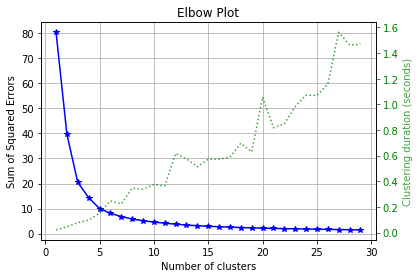

In [28]:
skplt.cluster.plot_elbow_curve(KMeans(random_state=1),reduced_data, cluster_ranges=range(1, 30))

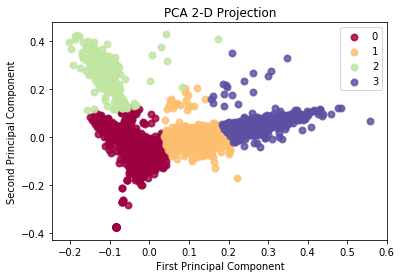

In [398]:
skplt.decomposition.plot_pca_2d_projection(spca, X.toarray(),Z)

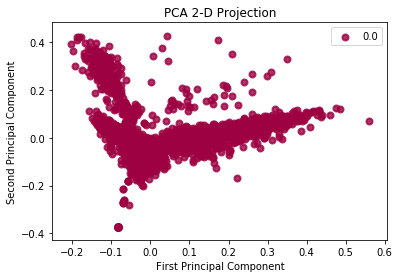

In [210]:
skplt.decomposition.plot_pca_2d_projection(spca, X.toarray(),np.zeros(5587))

In [15]:
ct = kmeans.cluster_centers_

[-0.25, 0.6, -0.45, 0.4]

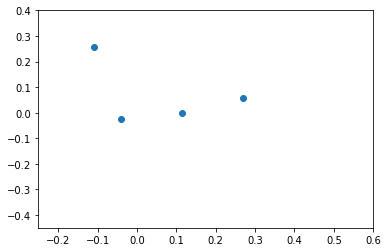

In [16]:
plt.scatter(ct[:,0],ct[:,1], label='Cluster centroids')
plt.axis([-0.25, 0.6, -0.45, 0.4])

In [366]:
label_articles = np.concatenate((np.array(ids).reshape(-1,1), Z.reshape(-1, 1)), axis=1)

In [367]:
label_articles = pd.DataFrame(label_articles, columns=("id", "label"))

In [382]:
#cluster 0
clus0 = label_articles[label_articles["label"] == 0]
clus0 = list(clus0["id"])
d_0 = d[d["id"].isin(clus0)]
word_0 = [ y.replace(")","").replace("(","").replace(".","").lower() for x in list(d_0["title"]) for y in x.split(" ") ]
l_0 = [(v, k) for k,v in  Counter(word_0).items() if k not in stop]
ndf_0 = [{"word" : v[1], "nb": v[0]} for v in sorted(l_0, reverse=True)]
revu_0 = d_0["venu"].value_counts()

In [383]:
revu_0

STOC                                                                        1345
SIGIR                                                                        453
SIGIR Forum                                                                  136
SIGIR Workshop: Information Retrieval Techniques for Speech Applications       3
Name: venu, dtype: int64

In [384]:
#cluster 1
clus1 = label_articles[label_articles["label"] == 1]
clus1 = list(clus1["id"])
d_1 = d[d["id"].isin(clus1)]
word_1 = [ y.replace(")","").replace("(","").replace(".","").lower() for x in list(d_1["title"]) for y in x.split(" ") ]
l_1 = [(v, k) for k,v in  Counter(word_1).items() if k not in stop]
ndf_1 = [{"word" : v[1], "nb": v[0]} for v in sorted(l_1, reverse=True)]
revu_1 = d_1["venu"].value_counts()

In [385]:
revu_1

SIGIR                                                                       126
SIGIR Forum                                                                  36
STOC                                                                          2
SIGIR Workshop: Information Retrieval Techniques for Speech Applications      2
Name: venu, dtype: int64

In [386]:
#cluster 2
clus2 = label_articles[label_articles["label"] == 2]
clus2 = list(clus2["id"])
d_2 = d[d["id"].isin(clus2)]
word_2 = [ y.replace(")","").replace("(","").replace(".","").lower() for x in list(d_2["title"]) for y in x.split(" ") ]
l_2 = [(v, k) for k,v in  Counter(word_2).items() if k not in stop]
ndf_2 = [{"word" : v[1], "nb": v[0]} for v in sorted(l_2, reverse=True)] 
revu_2 = d_2["venu"].value_counts()

In [387]:
revu_2

SIGIR          42
STOC           41
SIGIR Forum    11
Name: venu, dtype: int64

In [388]:
#cluster 3
clus3 = label_articles[label_articles["label"] == 3]
clus3 = list(clus3["id"])
d_3 = d[d["id"].isin(clus3)]
word_3 = [ y.replace(")","").replace("(","").replace(".","").lower() for x in list(d_3["title"]) for y in x.split(" ") ]
l_3 = [(v, k) for k,v in  Counter(word_3).items() if k not in stop]
ndf_3 = [{"word" : v[1], "nb": v[0]} for v in sorted(l_3, reverse=True)] 
revu_3 = d_3["venu"].value_counts()